In [172]:
# import opencv
import cv2

# import uuid
import uuid

In [173]:
# #  Image capture
# capturedVideo = cv2.VideoCapture(0)
# width = int(capturedVideo.get(cv2.CAP_PROP_FRAME_WIDTH))
# height = int(capturedVideo.get(cv2.CAP_PROP_FRAME_HEIGHT))

In [174]:
# while True: 
#     ret, frame = capturedVideo.read()
#     imgname = '.\\Images\\No Mask\\{}.jpg'.format(str(uuid.uuid1()))
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
    
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

In [175]:
# capturedVideo.release()
# capturedVideo.destroyAllWindows()

In [176]:
import json
from ibm_watson import VisualRecognitionV4
from ibm_watson.visual_recognition_v4 import FileWithMetadata, AnalyzeEnums
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [177]:
apiKey = 'KLT24k2OTHQVACVGzzucIuYTN8i6LSVpoowQ4tyVkhZJ'
url = 'https://api.us-south.visual-recognition.watson.cloud.ibm.com/instances/c493d0bd-9dcd-4507-96cc-ec4f3170da0f'
collectionID = 'b2dbf99f-3483-4508-8b1a-88f2b554cfbd'

In [178]:
authenticator = IAMAuthenticator(apiKey)
service = VisualRecognitionV4('2018-03-19', authenticator=authenticator)
service.set_service_url(url)

In [179]:
imgPath = './Images/Mask/34fd847f-687a-11eb-919b-ecf4bb18e5d3.jpg'

In [180]:
with open(imgPath, 'rb') as mask_img:
    analyze_images = service.analyze(collection_ids=[collectionID], 
                                     features=[AnalyzeEnums.Features.OBJECTS.value], 
                                    images_file=[FileWithMetadata(mask_img)]).get_result()

In [181]:
analyze_images

{'images': [{'source': {'type': 'file',
    'filename': '34fd847f-687a-11eb-919b-ecf4bb18e5d3.jpg'},
   'dimensions': {'height': 480, 'width': 640},
   'objects': {'collections': [{'collection_id': 'b2dbf99f-3483-4508-8b1a-88f2b554cfbd',
      'objects': [{'object': 'Mask',
        'location': {'left': 244, 'top': 232, 'width': 151, 'height': 112},
        'score': 0.9718037}]}]}}]}

In [182]:
obj = analyze_images['images'][0]['objects']['collections'][0]['objects'][0]['object']
coordinates = analyze_images['images'][0]['objects']['collections'][0]['objects'][0]['location']

In [183]:
coordinates

{'left': 244, 'top': 232, 'width': 151, 'height': 112}

In [184]:
from matplotlib import pyplot as plt

In [185]:
img = cv2.imread(imgPath)

In [186]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [187]:
rgbColor;
if obj == 'NoMask':
    rgbColor = (255,0,0)
else:
    rgbColor = (0,255,0)
img = cv2.rectangle(img, (coordinates['left'], coordinates['top']), (coordinates['left']+coordinates['width'], coordinates['top']+coordinates['height']), rgbColor, thickness=2)

In [188]:
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, text=obj, org=(coordinates['left']+coordinates['width'], coordinates['top']+coordinates['height']), fontFace=font, fontScale=2, color=rgbColor, thickness=2)

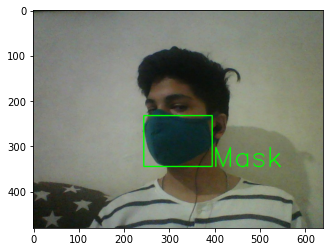

In [189]:
plt.imshow(img)

In [190]:
obj

'Mask'